In [ ]:
pip install pykrige


In [17]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("C:\\Users\\TUF\\Downloads\\APIMS-final.csv\\2018_API_index_65_city_Malaysia.csv")

# Extract columns
lon = df['lon'].values
lat = df['lat'].values
api = df['api'].values



Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 38
Full Sill: 43
Range: 1
Nugget: 5 



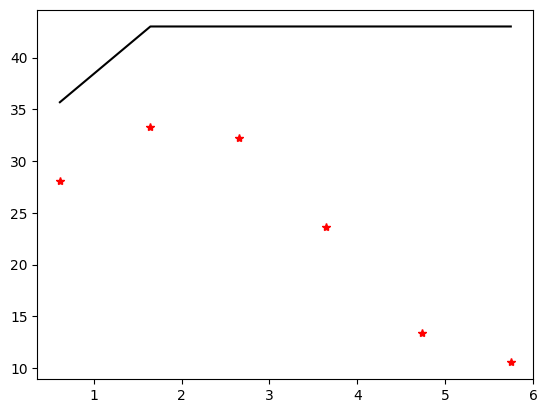

Calculating statistics on variogram model fit...


In [18]:
from pykrige.ok import OrdinaryKriging

# OK = OrdinaryKriging(lon, lat, api, variogram_model='spherical', enable_plotting=True, verbose=True)
OK = OrdinaryKriging(lon, lat, api, variogram_model='spherical', enable_plotting=True, variogram_parameters={'range': 1, 'nugget': 5, 'sill': 43}, verbose=True)


# Range: the distance beyond which points are not correlated; AKA the spread of influence of each point
# Nugget: the y-intercept of the variogram; AKA the measurement error
# Sill: the maximum variance possible; AKA the measurement variance plus the nugget

In [19]:
import numpy as np

# Define grid
grid_lon = np.arange(100.119736916, 104.324765220, 0.09)
grid_lat = np.arange(1.255854330,6.721694625, 0.09)

In [20]:
z_interp, ss = OK.execute('grid', grid_lon.flatten(), grid_lat.flatten())
print(z_interp.shape)
print(ss.shape)

Executing Ordinary Kriging...

(61, 47)
(61, 47)


In [ ]:
#* Write z_interp to a CSV file
import numpy as np
# np.savetxt('z_interp_traffic_2019.csv', z_interp, delimiter=',')


Text(0.5, 1.0, 'Kriging Interpolation (spherical) for API in 2018 in Malaysia')

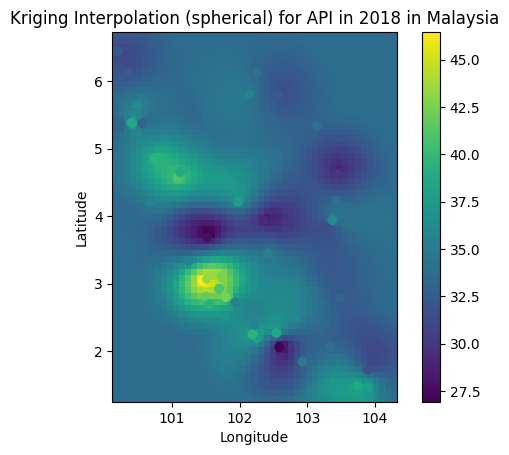

In [21]:
from matplotlib import pyplot as plt


cax = plt.imshow(z_interp, extent=(100.119736916, 104.324765220, 1.255854330,6.721694625), origin='lower')
plt.scatter(lon, lat, c=api)
plt.colorbar(cax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Kriging Interpolation (spherical) for API in 2018 in Malaysia')
